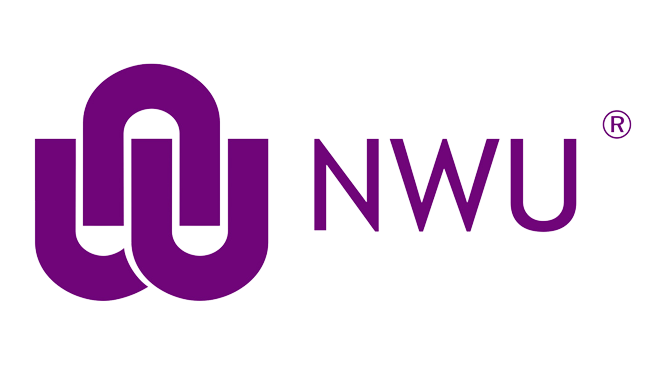

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname:Realeboga Moshotetsi



# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)


# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [8]:
from google.colab import files
uploaded = files.upload()


Saving countries.csv to countries (1).csv
Saving world_population.csv to world_population.csv


In [200]:
import pandas as pd

# Loading the csv files
countries_df = pd.read_csv("/content/countries.csv")
world_population_df = pd.read_csv("/content/world_population.csv")

In [199]:

def year_population(name_of_country):
    # This checks if the country exists in the list
    match = countries_df[countries_df["Country Name"].str.lower() == name_of_country.lower()]

    if match.empty:
      return f"Country '{name_of_country}' not found."

    idx = match.index[0] # Get the row index
    country_population = world_population_df.iloc[idx]

    df = pd.DataFrame({
        "Year": country_population.index.astype(str),
        "Measured Population": country_population.values
    }).dropna()

    # It converts year to numeric
    try:
      df["Year"] = pd.to_numeric(df["Year"])
    except:
      pass

    return df


In [195]:
print(year_population("Aruba"))

    Year  Measured Population
0   1960              54211.0
1   1961              55438.0
2   1962              56225.0
3   1963              56695.0
4   1964              57032.0
5   1965              57360.0
6   1966              57715.0
7   1967              58055.0
8   1968              58386.0
9   1969              58726.0
10  1970              59063.0
11  1971              59440.0
12  1972              59840.0
13  1973              60243.0
14  1974              60528.0
15  1975              60657.0
16  1976              60586.0
17  1977              60366.0
18  1978              60103.0
19  1979              59980.0
20  1980              60096.0
21  1981              60567.0
22  1982              61345.0
23  1983              62201.0
24  1984              62836.0
25  1985              63026.0
26  1986              62644.0
27  1987              61833.0
28  1988              61079.0
29  1989              61032.0
30  1990              62149.0
31  1991              64622.0
32  1992  

# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [185]:
from sklearn.model_selection import train_test_split

# This is the function to split the data
def data_split(df):

  # X = features(Year), y = target(Measured Population)
  X = df[["Year"]]
  y = df["Measured Population"]

  # The data is splitted into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  return X_train, y_train, X_test, y_test

  data = year_population("Aruba")
  X_train, y_train, X_test, y_test = data_split(data)

  # Checks first few rows of training features
  X_train.head(), y_train.head()

# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

Model trained successfully
Coefficient: 1054.9714568553043


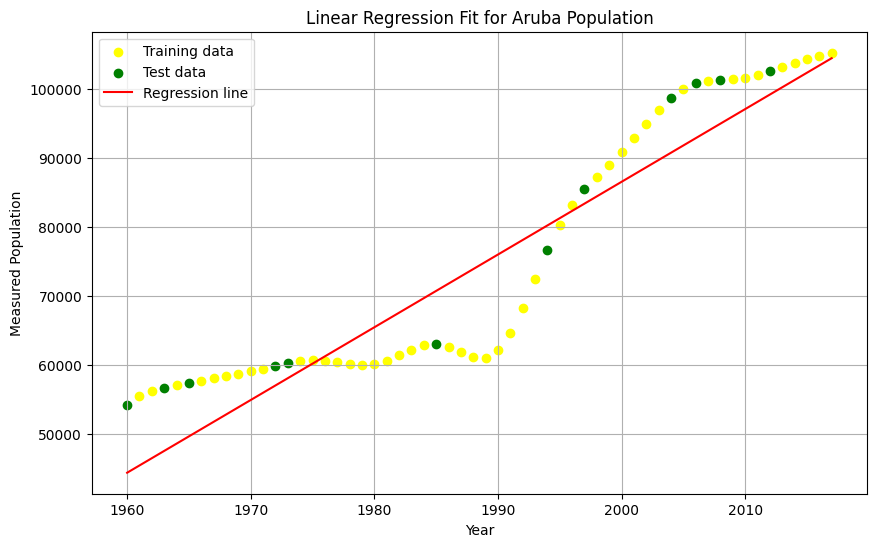

In [196]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def data_split(df):
    X = df[["Year"]]
    y = df["Measured Population"]
    return train_test_split(X, y, test_size=0.2, random_state=42)

data = year_population("Aruba")
X_train, X_test, y_train, y_test = data_split(data)

model = LinearRegression()
model.fit(X_train, y_train)

# Show model details
print("Model trained successfully")
print("Coefficient:", model.coef_[0])

plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='Yellow', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')

X_all = data[["Year"]]
y_pred_all = model.predict(X_all)
plt.plot(X_all, y_pred_all, color='red', label='Regression line')

plt.xlabel("Year")
plt.ylabel("Measured Population")
plt.title("Linear Regression Fit for Aruba Population")
plt.legend()
plt.grid(True)
plt.show()


# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [201]:
from sklearn.metrics import mean_squared_error

def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #print("Predicted values:", y_pred)
    #print("")
    #print("Actual values:", y_test.values)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    return mse

# Run test_model function and get the output
mse_score = test_model(model, X_test, y_test)

Mean Squared Error (MSE): 42488189.32


In [198]:
import numpy as np

mse = 42488189.32
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")


RMSE: 6518.30
